# Workshop_1_Analysis
- This jupyter deals with all the work requested from the workshop_1, loading and connecting to the database, in addition to the cloning of the original dataframe with the new Hired solicidate field.
- in addition to this whole process, this notebook includes a more in-depth analysis of the dataset with the new field requested, remember that although if SQL queries were made all these were made only for the above mentioned process since the analysis works with the new table brought from the database and saved as a dataframe (the analysis made later was not working with any SQL query).

# Import of libraries
- It is important to emphasize that environment variables are being handled as good practice and these variabes are saved in a file . env in the gitignore

In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
import pymysql

# Loading and handling of environment variables
- We use environment variables with a file. env as good practice in handling credentials in the main file that does the whole process (as is the case with this notebook)

In [2]:
load_dotenv()


True

In [3]:
db_user = os.getenv("DB_USER")
db_password = os.getenv("DB_PASSWORD")
db_host = os.getenv("DB_HOST")
db_database = os.getenv("DB_DATABASE")


# CSV reading and general exploration
### This general analysis which returns the information of each field and some of the records of our table, allows us to identify fundamental characteristics to our future analysis and process
- From this small first approach we can realize things like that the field of the day of application of the candidature is an object, format that makes it difficult for us to visualize, analyze and plot more in depth all the material that offers us a complete date (Year, month, day) 

In [4]:
candidates = '../Data/candidates.csv' 
candidates_df = pd.read_csv(candidates, delimiter=';') 
print(candidates_df.head())
print(candidates_df.info())


   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  
0                     3                          3  
1                     2                         10  
2          

# Connection to MySQL database

In [5]:
Workshop_1_mysql_connection = pymysql.connect(db=db_database, user=db_user, passwd=db_password)


# Loading the data and the candidates table to the database
- After reading and creating the connection with our database we proceed to upload the data from our table to the database


In [6]:
try:
    
    Workshop_1_mysql_connection_str = f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_database}'

    Workshop_1_mysql_db_connection = create_engine(Workshop_1_mysql_connection_str)
    print("Connection made to the database...")

    candidates_df.to_sql('candidates', con=Workshop_1_mysql_db_connection, index=False, if_exists='replace')
    print("Data loaded correctly in the 'candidates' table'")
    print("Check if the table was successfully added to your database (MySQL)")

except pymysql.Error as e:
    
    print(f"Failed to connect to MYSQL database: {e}")

finally:
    
    if 'workshop_1_mysql_db_connection' in locals():
        Workshop_1_mysql_db_connection.dispose()
    print("Data connection and upload done correctly, connection closed")


Connection made to the database...
Data loaded correctly in the 'candidates' table'
Check if the table was successfully added to your database (MySQL)
Data connection and upload done correctly, connection closed


# A new dataframe is created which is a copy of the original table with a new hired field 

- Throughout the code the number of individual records that comply with each restriction is also analyzed, such as the request to the database of total tables to confirm the creation of the latter
- If the field of code_challeng and tecnical_interview has a value greater than or equal to 7 in its register this shall be considered as an approved register having a Yes in the hired field
- If, on the other hand, the registration does not meet one or all of these requirements in these two different fields, it will not be considered approved and will have a No in the hired field

In [7]:
Workshop_querys_mysql_connection = pymysql.connect(db=db_database, user=db_user, passwd=db_password)

try:
    Workshop_querys_mysql_connection_str = f'mysql+pymysql://{db_user}:{db_password}@{db_host}/{db_database}'
    Workshop_querys_mysql_db_connection = create_engine(Workshop_querys_mysql_connection_str)

    candidates_select_all_data_sql_query = "SELECT * FROM candidates"
    candidates_df = pd.read_sql_query(candidates_select_all_data_sql_query, Workshop_querys_mysql_db_connection)

    candidates_df['Hired'] = candidates_df.apply(lambda row: 'Yes' if row['Technical Interview Score'] >= 7 and row['Code Challenge Score'] >= 7 else 'No', axis=1)

    code_challenge_aprobados_df = candidates_df[candidates_df['Code Challenge Score'] >= 7] 
    print(f"Number of records with Code Challenge Score >= 7: {len(code_challenge_aprobados_df)}")

    technical_interview_aprobados_df = candidates_df[candidates_df['Technical Interview Score'] >= 7] 
    print(f"Number of records with Technical Interview Score >= 7: {len(technical_interview_aprobados_df)}")

    candidates_show_tables_sql_query = "SHOW TABLES;"
    tabla_df = pd.read_sql_query(candidates_show_tables_sql_query, Workshop_querys_mysql_db_connection)
    print("These are the tables that the database has right now:")
    print(tabla_df)

    candidates_hired = 'candidates_hired'
    candidates_df.to_sql(candidates_hired, Workshop_querys_mysql_db_connection, index=False, if_exists='replace')

    print(f"Data loaded correctly in the table '{candidates_hired}'.")

    sql_query_hired = f"SELECT * FROM {candidates_hired}"
    candidates_hired_df = pd.read_sql_query(sql_query_hired, Workshop_querys_mysql_db_connection)
    print("New DataFrame with the 'Hired' field:")
    print(candidates_hired_df.head())

except pymysql.Error as e:
    print(f"Failed to connect to MYSQL database: {e}")

finally:
    if 'Workshop_querys_mysql_db_connection' in locals():
        Workshop_querys_mysql_db_connection.dispose()
        print("Creation of the new table with the field 'Hired', and other queries performed successfully, closing the new connection...")


Number of records with Code Challenge Score >= 7: 18232
Number of records with Technical Interview Score >= 7: 18269
These are the tables that the database has right now:
  Tables_in_workshop_1
0           candidates
1     candidates_hired
Data loaded correctly in the table 'candidates_hired'.
New DataFrame with the 'Hired' field:
   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level       

## We confirm that the new dataset complies with the new field and its restrictions
### As we can the table with its new field 'Hired' was created and uploaded to the database correctly
- What we are doing here in future is to handle the new dataframe that we did everything with pandas
- We see how the field 'Hired' successfully complies with the restrictions that we put it being the register 2 and 3 that at first glance make us realize this

In [8]:
print(candidates_hired_df.head())

   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score Hired  
0                     3                          3    No  
1                     2                         10  

# Number of records that do not meet the restrictions in the new field
- We do this to take a step by step of what will be an analysis on these approved and not approved records

In [9]:
Total_no_hired_registers = candidates_hired_df[candidates_hired_df['Hired'] == 'No'].shape[0]
print(f"Total records that do not meet the requirements for hiring: {Total_no_hired_registers}")

Total records that do not meet the requirements for hiring: 43302


# Number of records that meet the restrictions of the new field

In [10]:
Total_yes_hired_registers = candidates_hired_df[candidates_hired_df['Hired'] == 'Yes'].shape[0]
print(f"Total records that meet the requirements for hiring: {Total_yes_hired_registers}")

Total records that meet the requirements for hiring: 6698


# Display of records by hired field
- With this graphic we can give an idea of the difference between the candidates who were approved and those who were not in our dataset

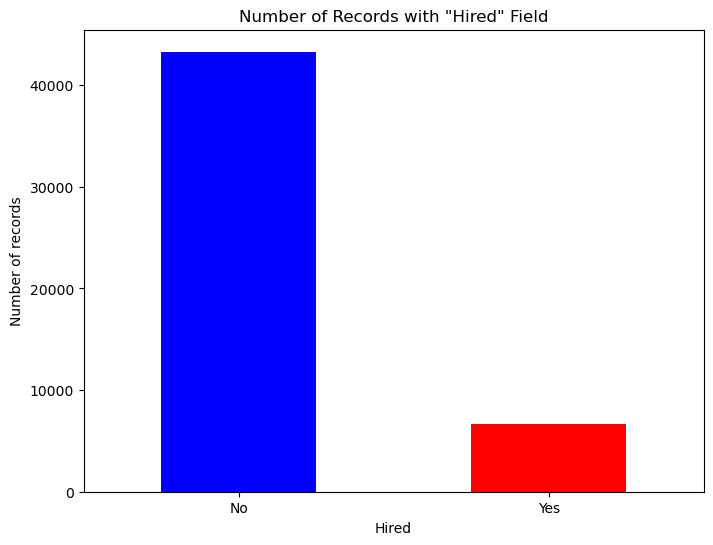

In [11]:
Total_Hired = candidates_hired_df['Hired'].value_counts()

plt.figure(figsize=(8, 6))
Total_Hired.plot(kind='bar', color=['blue', 'red'])
plt.title('Number of Records with "Hired" Field')
plt.xlabel('Hired')
plt.ylabel('Number of records')
plt.xticks(rotation=0)
plt.show()


# Analysis of the percentage of hires who were hired according to the new dataframe
- It is interesting to see how many total records only 13.40% of all those records met the requirements to be hired

In [12]:
Registers_Hired = len(candidates_hired_df[candidates_hired_df['Hired'] == 'Yes'])

Total_of_registers = len(candidates_hired_df)

Rate_of_registers = (Registers_Hired  / Total_of_registers) * 100

print(f"Percentage of employees: {Rate_of_registers:.2f}%")


Percentage of employees: 13.40%


# Pastel graphic

- We do this graph with a proposition and is to be able to visualize the totality of candidates that were not approved, against which we now know are the other 13.40% candidates that we know if they were approved

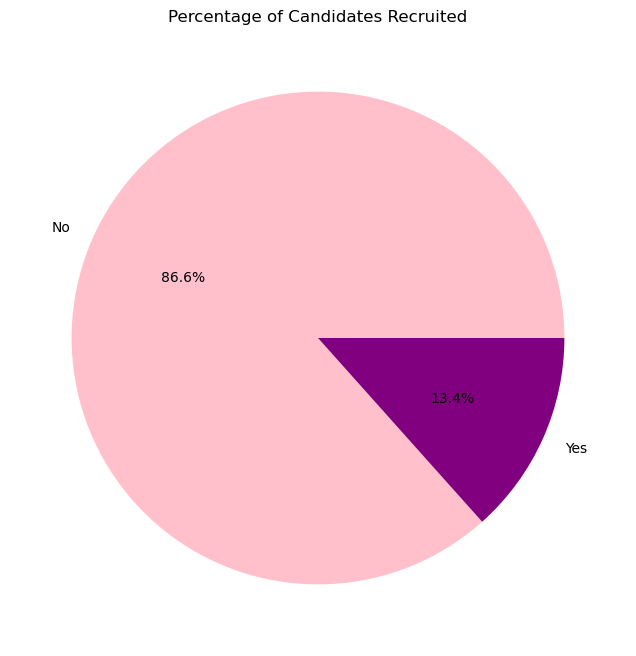

In [13]:
Number_of_hireds = candidates_hired_df['Hired'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Number_of_hireds, labels=Number_of_hireds.index, autopct='%1.1f%%', colors=['pink', 'purple'])

plt.title('Percentage of Candidates Recruited')

plt.show()


# Analysis first approach to what will be the dashboard of our Workshop
- the graphs that you will see are made in order to be able to compare them with the orders explicitly in the dashboard of the job, being able to understand them better and already go with certain conclusions of how some data will tend to behave when making our dashboard

# Technology approved number graphic bar
- This graph allows us to see a trend between two technologies called "Game development" and "Dep Ops" which are the most accepted in our dataset, while the others follow a not so large number of records between

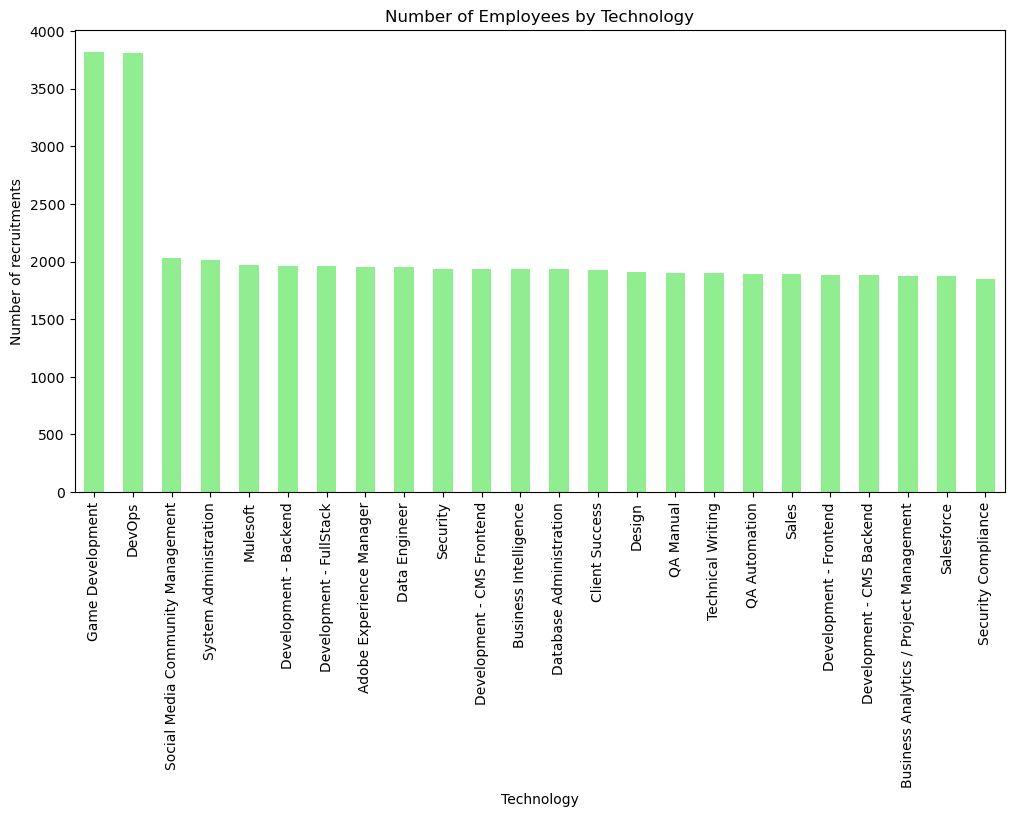

In [14]:
Hired_by_tecnology = candidates_hired_df.groupby('Technology')['Hired'].count().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
Hired_by_tecnology.plot(kind='bar', color='lightgreen')
plt.title('Number of Employees by Technology')
plt.xlabel('Technology')
plt.ylabel('Number of recruitments')
plt.show()

# Graphic of the number of contracts by the countries requested in the workshop

- This style of graphics allows us to see the total number of hires that each country had, while what can be seen in the dashboard is also analyzed a behavior taking into account the years

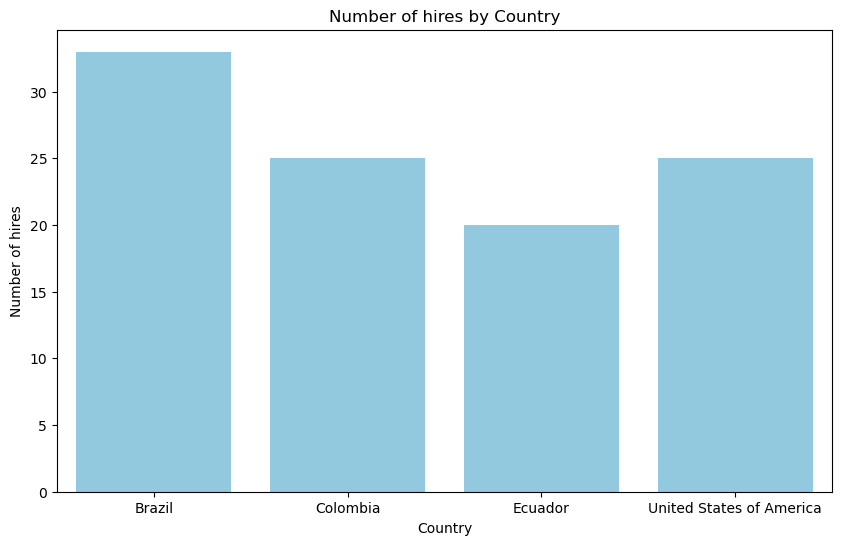

In [15]:
Specific_countries = ['Brazil', 'Colombia', 'Ecuador', 'United States of America']
Filtered_df = candidates_hired_df[candidates_hired_df['Country'].isin(Specific_countries)]

Hired_by_country_total_counts = Filtered_df[Filtered_df['Hired'] == 'Yes'].groupby('Country').size()

plt.figure(figsize=(10, 6))
sns.barplot(x=Hired_by_country_total_counts.index, y=Hired_by_country_total_counts.values, color='skyblue')
plt.title('Number of hires by Country')
plt.xlabel('Country')
plt.ylabel('Number of hires')
plt.show()




# Graph of the number of contracts for each year of the dataset
- This graph allows us to see how a year in specicio (2022) brings with it the year with fewer hires by far, this data is very important when we seek to see and analyze different data per year

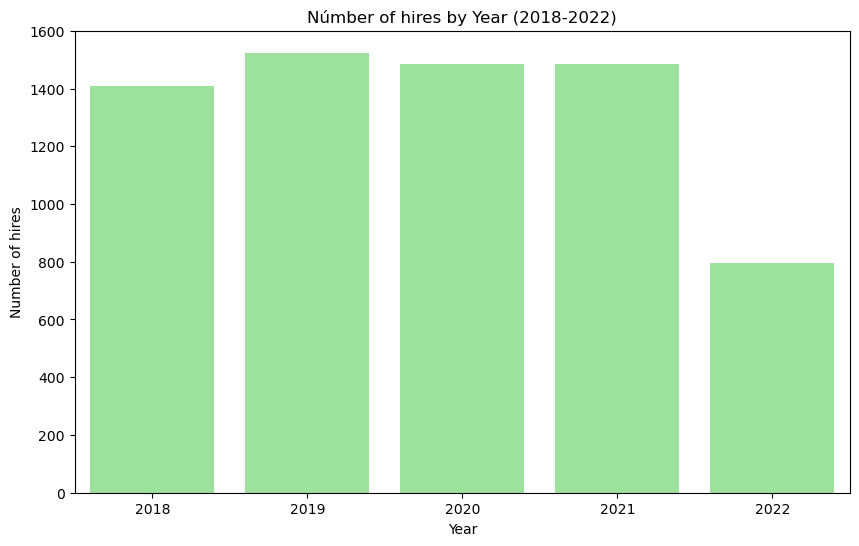

In [16]:
candidates_hired_df['Application Date'] = pd.to_datetime(candidates_hired_df['Application Date'])

Filtered_years_2018_to_2019_df = candidates_hired_df[(candidates_hired_df['Application Date'].dt.year >= 2018) & (candidates_hired_df['Application Date'].dt.year <= 2022)]

Hired_by_year_counts = Filtered_years_2018_to_2019_df[Filtered_years_2018_to_2019_df['Hired'] == 'Yes'].groupby(Filtered_years_2018_to_2019_df['Application Date'].dt.year).size()

plt.figure(figsize=(10, 6))
sns.barplot(x=Hired_by_year_counts.index, y=Hired_by_year_counts.values, color='lightgreen')
plt.title('Númber of hires by Year (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Number of hires')
plt.show()



# Pie chart of the distribution of contract by Seniority
- This graph allows us to visualize that Seniority was the one that most contracted in general, also realize that it is not excatmanete a "perfect" distribution there is no Seniority that has been delayed by a very high percentage

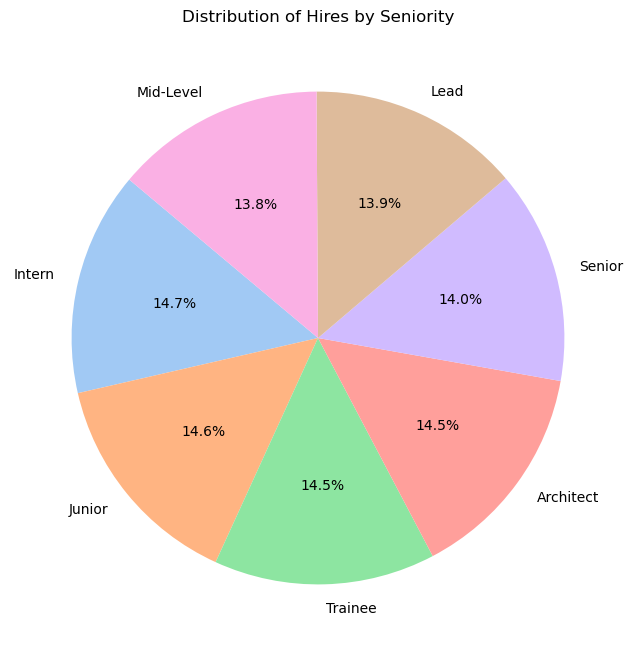

In [17]:

Hired_by_seniority_counts = candidates_hired_df[candidates_hired_df['Hired'] == 'Yes']['Seniority'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Hired_by_seniority_counts, labels=Hired_by_seniority_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)
plt.title('Distribution of Hires by Seniority')
plt.show()
